In [1]:
pip install tensorflow keras numpy matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include channel dimension (28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\91963\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.7693 - loss: 0.7262 - val_accuracy: 0.9821 - val_loss: 0.0617
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.9667 - loss: 0.1138 - val_accuracy: 0.9852 - val_loss: 0.0441
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.9778 - loss: 0.0714 - val_accuracy: 0.9879 - val_loss: 0.0354
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.9819 - loss: 0.0650 - val_accuracy: 0.9899 - val_loss: 0.0299
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9845 - loss: 0.0512 - val_accuracy: 0.9909 - val_loss: 0.0272
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.9868 - loss: 0.0408 - val_accuracy: 0.9923 - val_loss: 0.0231
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9873 - loss: 0.0402 - val_accuracy: 0.9930 - val_loss: 0.0222
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.9898 - loss: 0.0363 - 

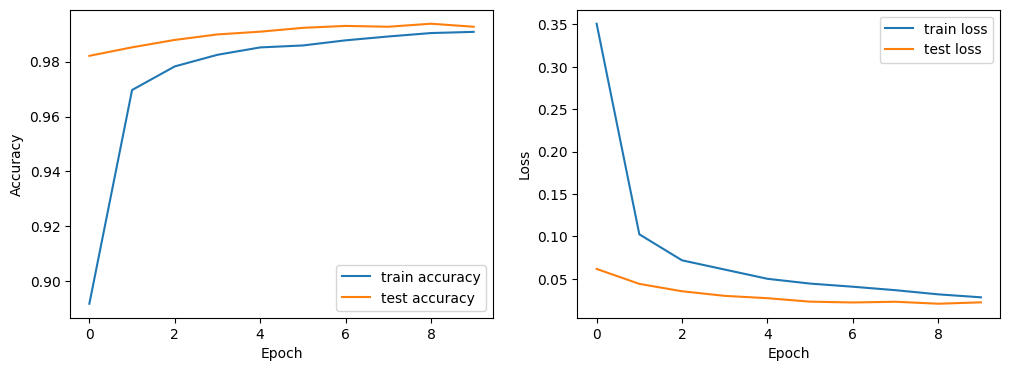

In [4]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9906 - loss: 0.0284
Test accuracy: 0.9926999807357788


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


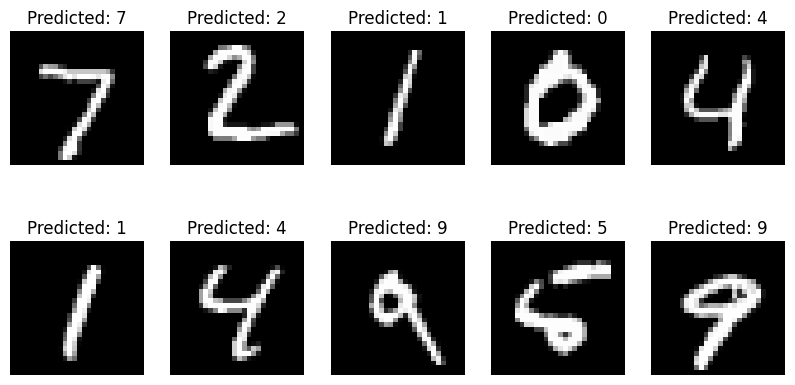

In [6]:
import numpy as np

# Predict on the first 10 images from the test set
predictions = model.predict(x_test[:10])

# Plot the results
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.show()

In [7]:
model.save('mnist_cnn.h5')

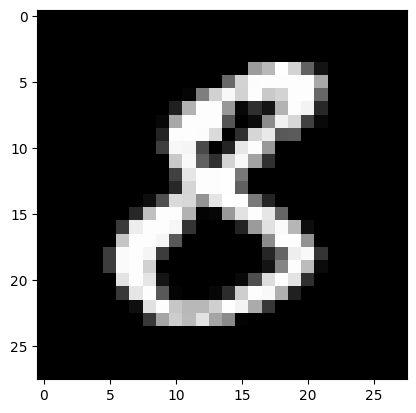

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted digit: 8


In [8]:
from tensorflow.keras.models import load_model
model = load_model('mnist_cnn.h5')

# Example of using the loaded model to make a prediction
image_index = 1234
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.show()

pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(f"Predicted digit: {np.argmax(pred)}")
